# Train 정답 answer Embedding 변환 및 저장

In [ ]:
from sentence_transformers import SentenceTransformer

# 데이터 로드
train_df = pd.read_csv('../data/train.csv', encoding='utf-8-sig')

# 임베딩 모델 로드
# embedding_model_name = "jhgan/ko-sbert-sts"
embedding_model_name = "upskyy/bge-m3-korean"
embedding_model = SentenceTransformer(embedding_model_name)

# 정답 문장들
true_answers = train_df['answer'].tolist()

# 임베딩 생성
true_embeddings = embedding_model.encode(true_answers)

In [ ]:
import numpy as np
np.save('../data/train_answer_embeddings.npy', true_embeddings)
true_embeddings.shape

(22601, 1024)

In [ ]:
# 입력 문장들
input_questions = train_df['question'].tolist()
question_embeddings = embedding_model.encode(input_questions)

In [ ]:
np.save('../data/train_question_embeddings.npy', question_embeddings)
question_embeddings.shape

(22601, 1024)

# PCA 적정 주성분 개수 파악

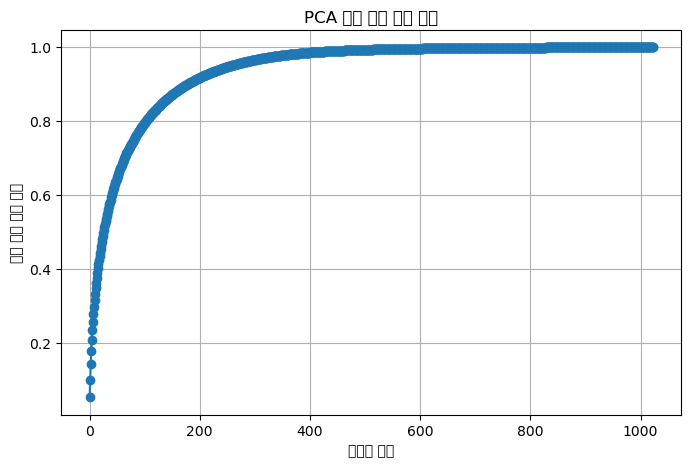

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

embeddings = np.load('../data/train_question_embeddings.npy')
# 임베딩 벡터 정규화
from sklearn.preprocessing import normalize
embeddings = normalize(embeddings, norm='l2')

pca = PCA()
pca.fit(embeddings)

embeddings = pca.transform(embeddings)
embeddings = normalize(embeddings, norm='l2')

# 각 주성분의 설명 분산 비율 확인
explained_variance = pca.explained_variance_ratio_

# 누적 설명 분산 비율 계산
cumulative_variance = np.cumsum(explained_variance)

# warning 제거
import warnings
warnings.filterwarnings('ignore')

# 누적 설명 분산 비율 그래프로 시각화
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('주성분 개수')
plt.ylabel('누적 설명 분산 비율')
plt.title('PCA 누적 설명 분산 비율')
plt.grid(True)
plt.show()


In [ ]:
# 90%와 95% 설명 분산 보존을 위한 주성분 수 결정
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print("90%의 분산을 보존하기 위해 필요한 주성분 개수:", n_components_90)
print("95%의 분산을 보존하기 위해 필요한 주성분 개수:", n_components_95)

90%의 분산을 보존하기 위해 필요한 주성분 개수: 179
95%의 분산을 보존하기 위해 필요한 주성분 개수: 258


In [ ]:
print(f"pca 3개의 정보량: {cumulative_variance[2]}")

pca 3개의 정보량: 0.14114822447299957
